### World Happiness Visualisation
*Source: https://www.kaggle.com/sabihaif/world-happiness-report-analysis*

In [7]:
# Import all libraries as required
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
# Load dataset
data2015 = pd.read_csv("happyworld.csv")
location = pd.read_csv("concap.csv")
data2015.head()

,ID,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [16]:
location.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [17]:
data2015.describe()

,ID,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,495.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,247.000000,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,143.038456,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,0.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,123.500000,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,247.000000,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,370.500000,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,494.000000,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [11]:
#columns of data
data2015.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [18]:
data2015.shape

(495, 13)

In [21]:
data2015.dtypes

ID                                 int64
Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [13]:
#information about data
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 13 columns):
Unnamed: 0                       495 non-null int64
Country                          495 non-null object
Region                           495 non-null object
Happiness Rank                   470 non-null float64
Happiness Score                  470 non-null float64
Economy (GDP per Capita)         470 non-null float64
Family                           470 non-null float64
Health (Life Expectancy)         470 non-null float64
Freedom                          470 non-null float64
Trust (Government Corruption)    470 non-null float64
Generosity                       470 non-null float64
Dystopia Residual                470 non-null float64
Year                             495 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 50.4+ KB


Some basic operations on columns like sum, mean, unique etc. Create any basic array variable to capture & print these.

In [34]:
StatsDemo=[data2015['Economy (GDP per Capita)'].sum(), data2015['Economy (GDP per Capita)'].mean(),
    data2015['Economy (GDP per Capita)'].nunique(), data2015['Economy (GDP per Capita)'].max(), 
    data2015['Economy (GDP per Capita)'].min()]
print(StatsDemo)

[436.08013129600005, 0.9278300665872341, 467, 1.870765686, 0.0]


Many other basic tasks like selecting first 158 rows using indexed row numbers is

In [52]:
datareduce=data2015.iloc[0:158, :]
datareduce.head()

,ID,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [53]:
datareduce.shape

(158, 13)

Notice we have only 158 rows from earlier 495 rows. Similarly to select say column numners 0,1,4,5 using indexed column numbers is
#### data.iloc[:, [0,1,4,5)

In [54]:
# Delete the "ID" column from the dataframe
datanew = datareduce.drop("ID", axis=1)
datanew.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


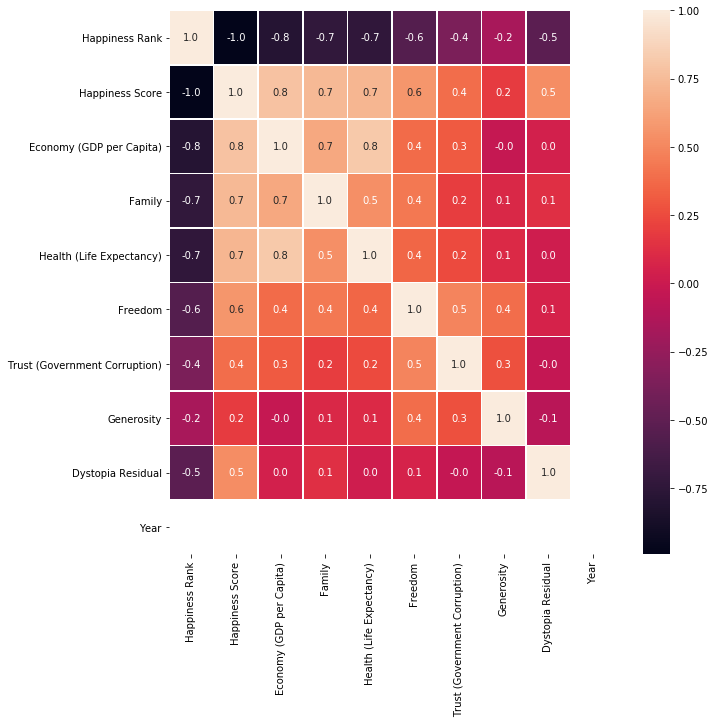

In [56]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(datanew.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

According to the correlation map there is a strong positive relationship between Happiness Score, Economy, Family and Health.

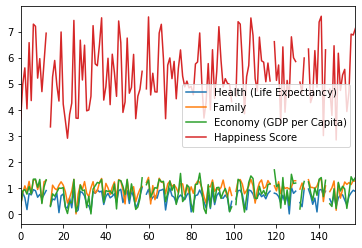

In [57]:
data_plot = datanew.loc[:,["Health (Life Expectancy)","Family", "Economy (GDP per Capita)","Happiness Score" ]]
data_plot.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f963270b4f0>,
      dtype=object)

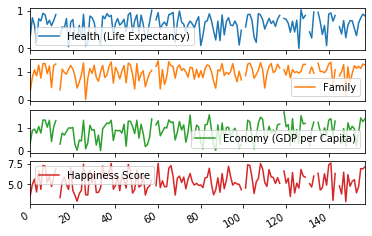

In [58]:
data_plot.plot(subplots = True)

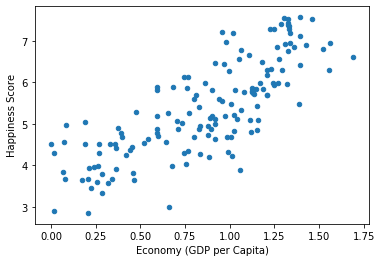

In [59]:
data_plot.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score")

We can see this positive relationship between happiness score and economy from scatterplot. Go back to main dataset ie. data2015 & drop ID column.

In [61]:
# Delete the "ID" column from the dataframe
data2015red = data2015.drop("ID", axis=1)
data2015red.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [62]:
data2015red.shape

(495, 12)

In [63]:
data2015red.Region.unique()

array(['Southern Asia', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Australia and New Zealand',
       'Western Europe', 'Southeastern Asia', 'North America',
       'Eastern Asia'], dtype=object)

Text(0.5, 1.0, 'Happiness Score Ratio by Regions')

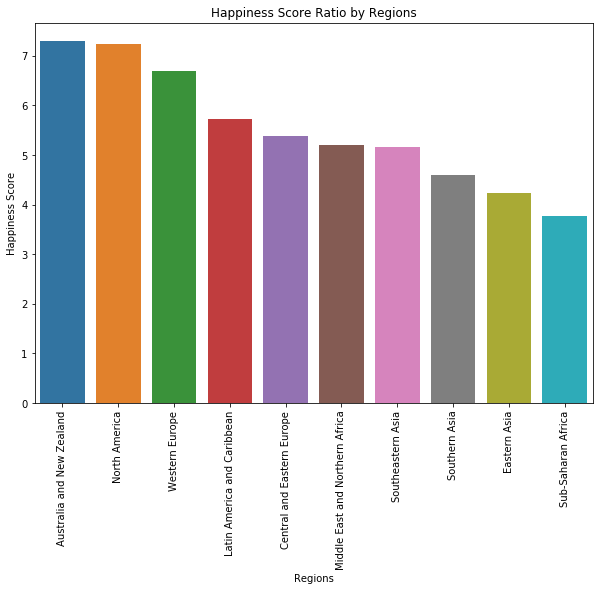

In [65]:
region_list = list(data2015.Region.unique())
region_happiness_score_ratio = []
for i in region_list:
    x = data2015[data2015.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    region_happiness_score_ratio.append(region_happiness_score_rate)
#I want to sort my new data 
data_bar = pd.DataFrame({'region_list':region_list, 'region_happiness_score_ratio':region_happiness_score_ratio})
new_index = (data_bar['region_happiness_score_ratio'].sort_values(ascending = False)).index.values
sorted_data = data_bar.reindex(new_index)

#visualisation
plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_happiness_score_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Ratio by Regions')

Text(0.5, 1.0, 'Economy Ratio by Regions')

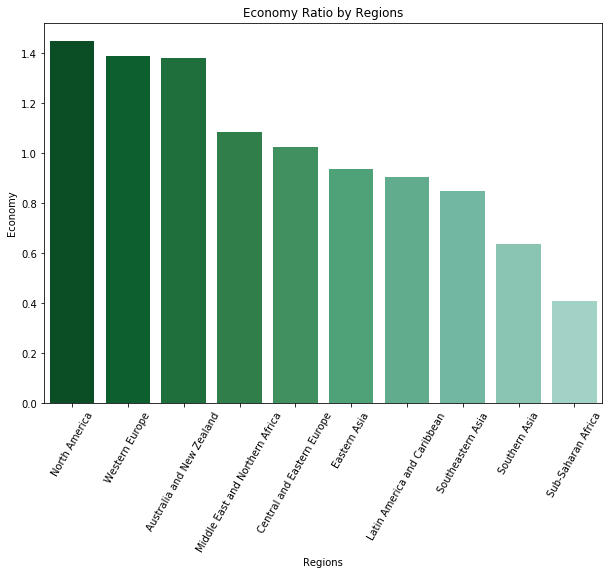

In [66]:
region_economy_ratio = []
for i in region_list:
    y = data2015[data2015.Region == i]
    region_economy_rate = sum(y['Economy (GDP per Capita)'])/len(y)
    region_economy_ratio.append(region_economy_rate)
    
data_bar2 = pd.DataFrame({'region_list':region_list,'region_economy_ratio':region_economy_ratio})
new_index2=(data_bar2['region_economy_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data_bar2.reindex(new_index2)

plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['region_economy_ratio'], palette = sns.color_palette("BuGn_r",15) )
plt.xticks(rotation= 60)
plt.xlabel('Regions')
plt.ylabel('Economy')
plt.title('Economy Ratio by Regions')

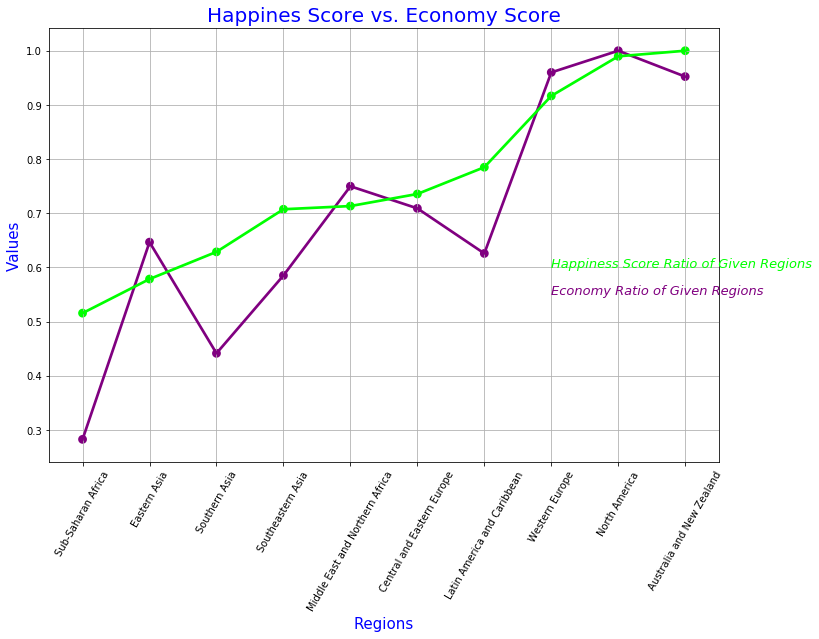

In [67]:
sorted_data.region_happiness_score_ratio = sorted_data.region_happiness_score_ratio/max(sorted_data.region_happiness_score_ratio)
sorted_data2.region_economy_ratio = sorted_data2.region_economy_ratio/max(sorted_data2.region_economy_ratio)
data = pd.concat([sorted_data,sorted_data2.region_economy_ratio],axis = 1)
data.sort_values("region_happiness_score_ratio",inplace = True)

#visualisation
f,ax1 = plt.subplots(figsize = (12,8))
sns.pointplot(x = "region_list",y = "region_economy_ratio",data = data,color = 'purple',alpha = 0.7)
sns.pointplot(x = "region_list",y = "region_happiness_score_ratio", data = data,color = 'lime',alpha = 0.7)
plt.text(7,0.6, "Happiness Score Ratio of Given Regions",color = 'lime',fontsize = 13,style = 'italic' )
plt.text(7,0.55, "Economy Ratio of Given Regions",color = 'purple',fontsize = 13,style = 'italic')
plt.xlabel('Regions', fontsize = 15, color = 'blue')
plt.ylabel('Values', fontsize = 15, color ='blue')
plt.xticks(rotation = 60)
plt.title('Happines Score vs. Economy Score', fontsize = 20, color = 'blue')
plt.grid()

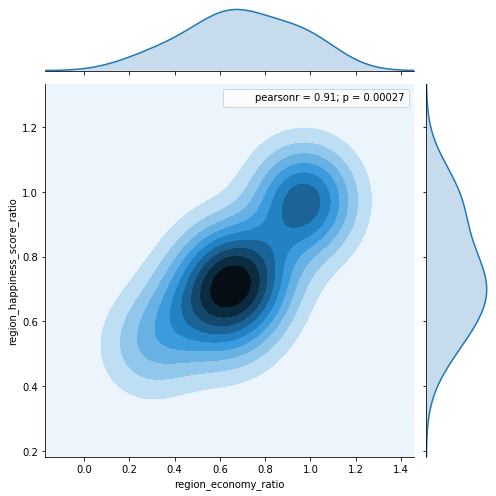

In [68]:
g = sns.jointplot(data.region_economy_ratio, data.region_happiness_score_ratio, kind = "kde", height = 7)
g.annotate(stats.pearsonr)
plt.show()

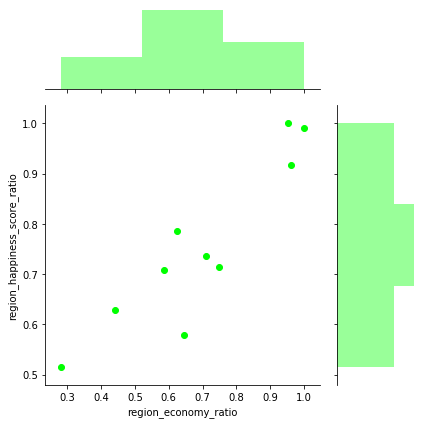

In [69]:
g = (sns.jointplot('region_economy_ratio', 'region_happiness_score_ratio',data = data, color = 'lime', ratio = 3))

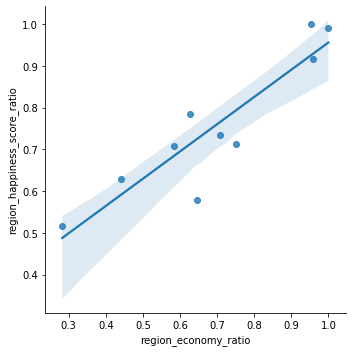

In [70]:
sns.lmplot('region_economy_ratio', 'region_happiness_score_ratio',data = data)
plt.show()

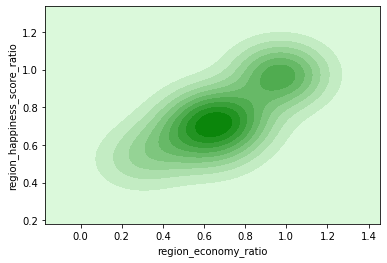

In [71]:
sns.kdeplot(data.region_economy_ratio, data.region_happiness_score_ratio, shade = True, cut = 3, color ='green')
plt.show()

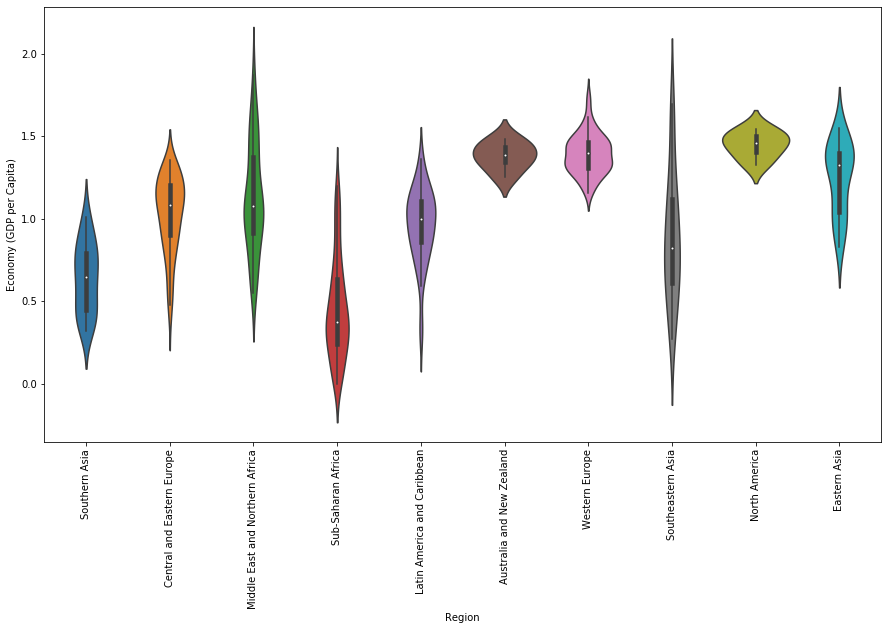

In [72]:
f,ax1 = plt.subplots(figsize = (15,8))
sns.violinplot(x = data2015.Region, y = data2015['Economy (GDP per Capita)'])
plt.xticks(rotation = 90)
plt.show()

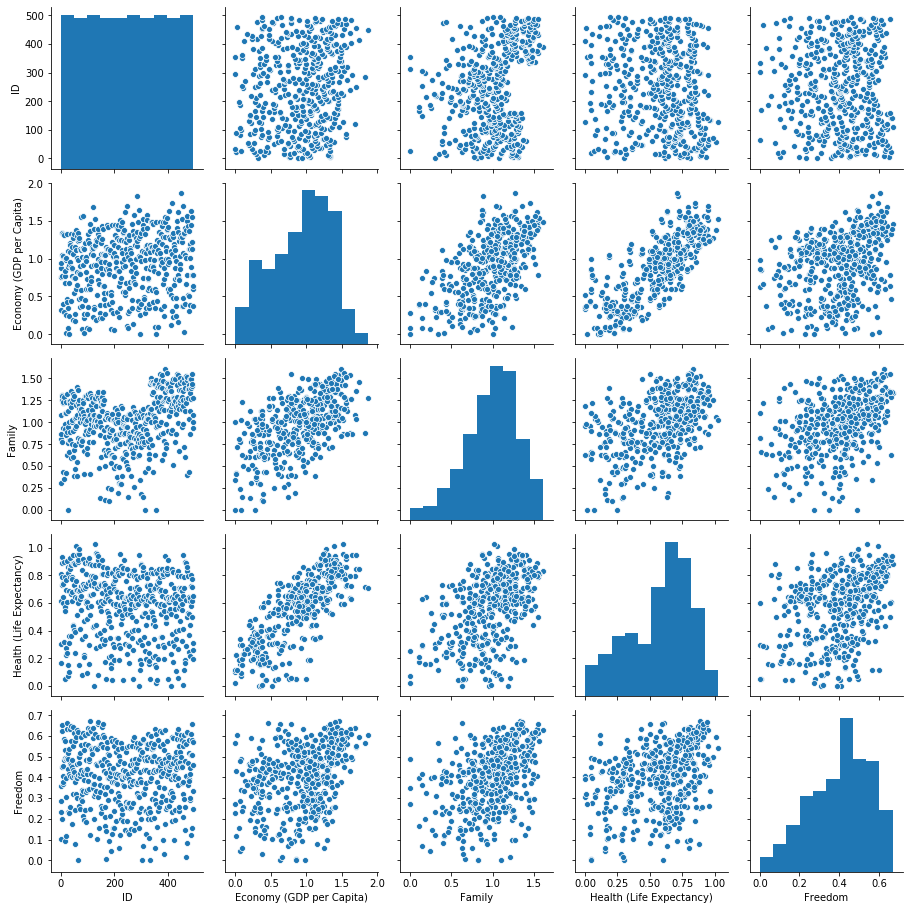

In [73]:
sns.pairplot(data2015.iloc[:,[0,5,6,7,8]])
plt.show()

In [74]:
data_new = pd.merge(location[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
data2015,left_on='CountryName',right_on='Country')
data_new.shape

(465, 17)

In [75]:
filter1 = data_new['Happiness Score']>=6.5
happy_countries = data_new[filter1]
happy_countries.Region.unique()

array(['Latin America and Caribbean', 'Australia and New Zealand',
       'Western Europe', 'North America', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Southeastern Asia'],
      dtype=object)

In [76]:
happy_countries.Region.value_counts()

Western Europe                     41
Latin America and Caribbean        20
Middle East and Northern Africa     8
North America                       6
Australia and New Zealand           6
Southeastern Asia                   3
Central and Eastern Europe          3
Name: Region, dtype: int64

Text(0.5, 1.0, 'Disstribution of the Happiest Countries by Region')

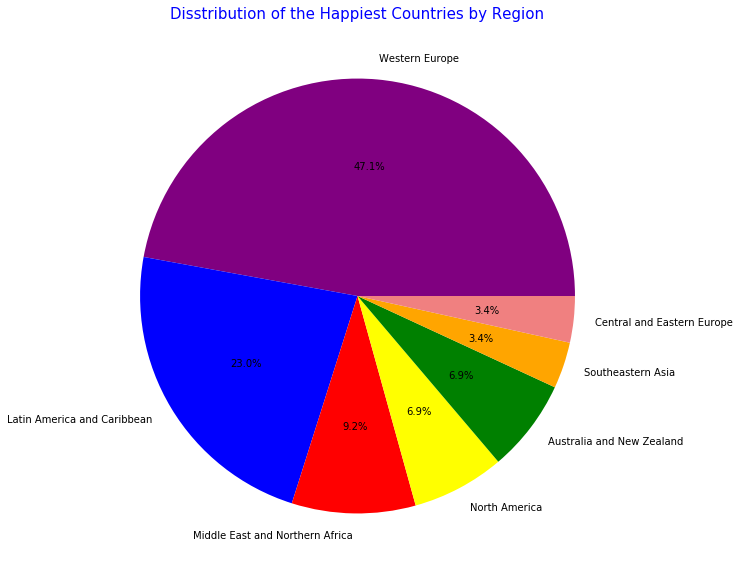

In [77]:
labels = happy_countries.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange','lightcoral']
explode = [0,0,0,0,0,0,0]
sizes = happy_countries.Region.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Disstribution of the Happiest Countries by Region',color = 'blue',fontsize = 15)

In [78]:
happiness_score = data_new['Happiness Score'].astype(float)

In [79]:
data = [dict(
        type='choropleth',
        colorscale = 'Rainbow',
        locations = data_new['CountryName'],
        z = happiness_score,
        locationmode = 'country names',
        text = data_new['Country'],
        colorbar = dict(
        title = 'Happiness Score', 
        titlefont=dict(size=25),
        tickfont=dict(size=18))
)]
layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
iplot(choromap, validate=False)